#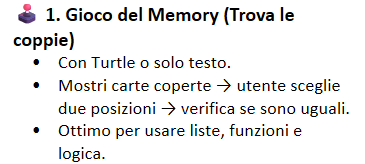

Perfetto! Il **gioco del Memory** è un ottimo progetto per consolidare concetti come liste, grafica (con `turtle` o librerie GUI), cicli, gestione dello stato, confronto tra elementi... Ti riporto prima il **testo** del progetto e poi i **6 suggerimenti** per aiutarti a svilupparlo da solo.

---

## 🧠 Gioco del Memory – Testo del Progetto

**Obiettivo:**
Crea un gioco in cui l’utente deve trovare le coppie di carte uguali, come nel classico "Memory". Le carte sono disposte coperte. A ogni turno il giocatore scopre due carte: se sono uguali restano scoperte, altrimenti si richiudono. Il gioco termina quando tutte le coppie sono trovate.

### Requisiti principali:

* Mostra un certo numero di carte (es. 4x4).
* Le carte devono essere coperte inizialmente.
* L’utente può cliccare su due carte per scoprirle.
* Se sono uguali, restano scoperte. Se sono diverse, si richiudono dopo un attimo.
* Fine del gioco quando tutte le coppie sono scoperte.
* (Facoltativo) Mostra punteggio o numero di tentativi.

---

## ✅ Sei Suggerimenti per Svilupparlo

1. **Crea una griglia con coppie mescolate:**

   * Usa una lista con elementi duplicati (`[1,2,3,4,1,2,3,4]` ad esempio).
   * Usa `random.shuffle()` per mescolare l’ordine delle carte.

2. **Scegli una libreria per la GUI:**

   * Puoi usare `turtle` (più semplice e grafico) o `tkinter` (più flessibile).
   * Ogni carta può essere rappresentata da un rettangolo colorato o da un numero.

3. **Gestisci lo stato delle carte:**

   * Tieni traccia di quali carte sono *scoperte* e quali ancora *coperte*.
   * Usa una lista o un dizionario per segnare lo stato.

4. **Gestisci il click su una carta:**

   * Quando l’utente clicca, scopri la carta.
   * Se è la seconda carta scoperta, confronta con la prima.

5. **Implementa un ritardo per nascondere le carte sbagliate:**

   * Usa `time.sleep()` (con `turtle`) o `after()` (con `tkinter`) per aspettare 1 secondo prima di richiudere.

6. **Verifica la fine del gioco:**

   * Controlla se tutte le carte sono state scoperte.
   * Se sì, stampa “Hai vinto!” o mostra un messaggio.

---

Se vuoi possiamo fare prima la versione con `turtle`, poi una più avanzata con `tkinter` o `pygame`.
Vuoi partire dalla struttura base e costruirla passo passo insieme?


In [ ]:
import turtle
from turtle import Turtle,Screen
import random
import time
# Costanti
NUM_CARTE = 4  # 4 coppie = 8 carte in totale
DIM_CARTE = 60
SPAZIO = 20

# Mescoliamo le carte
carte = list(range(1, NUM_CARTE + 1)) * 2  # [1,2,3,4,1,2,3,4]
random.shuffle(carte)

# Stato delle carte: True se scoperta, False se coperta
stato_carte = [False] * len(carte)

# Coordinate iniziali
start_x = -((DIM_CARTE + SPAZIO) * 4) // 2
start_y = 0

# Finestra e tartaruga
schermo = Screen()
schermo.title("Gioco del Memory")
t = Turtle()
t.penup()
t.hideturtle()
t.speed(0)

def disegna_griglia():
    """Disegna tutte le carte, scoperte o coperte"""
    t.clear()
    for i in range(len(carte)):
        x = start_x + (DIM_CARTE + SPAZIO) * (i % 4)
        y = start_y - (DIM_CARTE + SPAZIO) * (i // 4)
        if stato_carte[i]:
            # Carta scoperta → mostra il numero
            t.goto(x + 10, y - 40)
            t.write(str(carte[i]), font=("Arial", 24, "bold"))
        else:
            # Carta coperta → disegna un quadrato
            t.goto(x, y)
            t.fillcolor("lightgray")
            t.begin_fill()
            for _ in range(4):
                t.forward(DIM_CARTE)
                t.right(90)
            t.end_fill()

# Mostra le carte inizialmente tutte coperte
disegna_griglia()

global prima_carta, bloccato
prima_carta = None

def gestisci_click(x,y):
  bloccato= False
  #TODO: Capire quale carta è stata cliccata
  if bloccato:
    return

  col= int((x-start_x) // (DIM_CARTE+SPAZIO))
  row= int((start_y - y) // (DIM_CARTE+SPAZIO))
  if 0<=col <4 and 0<= row<4 :
    indice = row*4+col
    print(f"Hai cliccato sulla carta {indice} (riga {row}. colonna {col})")
    if not stato_carte[indice]:
      stato_carte[indice]=True
      disegna_griglia()
      if prima_carta is None:
        # 1a carta cliccata
        prima_carta= indice
      else :
        #2a carta cliccata
        bloccato = True
        turtle.ontimer(lambda: controlla_coppia(prima_carta, indice), 1000) #aspetta 1 secondo

def controlla_coppia(i1,i2):
  global prima_carta, bloccato
  if carte[i1]!=carte[i2]:
    stato_carte[i1]=False
    stato_carte[i2]=False
  disegna_griglia()
  prima_carta=None
  bloccato=False

schermo.onscreenclick(gestisci_click)
schermo.mainloop()


TclError: no display name and no $DISPLAY environment variable

In [ ]:
import tkinter as tk
import random
#Creazione finsetra principale
finestra= tk.Tk()
finestra.title("MEMORY GAME")

#Due coppie di numeri da 1 a 8
def create_cards():
  numbers= list(random(1,9))*2
  random.shuffle(numbers) #Vado a mischiarle

if main():
#Vado a creare carte richiamando la funzione create_cards()
  cards=create_cards()
#Dizionario per tenere traccia delle carte
  buttons_cards={}
#Variabili per gestire lo stato del gioco
  first_card= None
  second_card= None
  revealed_set=set()
#creo un set tiene traccia delle coppie trovate
#Funzione per gestire il clic su una carta
  def on_card_click(row, col):
    nonlocal first_card, second_card
#nonlocal serve per accedere anche fuori alla funzione, senza nonlocal non potrebbero essere modificate al di fuori
#Se le carte sono state già scoperte non fare nulla
    if (row,col) not in revealed_set:
      return
    #Scopri la carta
    card_buttons[(row,col)].config(text=str(cards[row*4+col]))
    #Verifica se è la 1 carta
    if not first_card:
      first_card = (row,col)
    #Verifica se è la seconda carta
    elif not second_card:
      second_card = (row,col)

    #Confronta le 2 carte
    if cards[first_card[0]*4+first_card[1]]==cards[second_card[0]*4+second_card[1]]:
      revealed_set.add(first_card)
      revealed-card.add(second_card)
      check_game_end() #verifica se il gioco è finito
    else :
      finestra.after(1000,hide_cards)

#Nascondi le carte dopo un breve periodo
  def hide_cards():
    for card in [first_card, second-card]:
      if card not in revealed_set:
        card_buttons[(cards)].config(text='?')

#Verifica se tutte le carte sono state rivelate
  def check_game_end():
    if len(revealed_set)==len(cards):
      messagebox.showinfo('Vittoria hai trovato le coppie')


#Resetta la selezione delle carte
#Nascondi le 2 carte se sono diverse:
#Vado a creare i pulsanti delle carte:
  for i in range(4):
    for j in range(4):
      btn=tk.Button(finestra,text= 'Premi', comand= lambda i=i,j=j: on_card_click)
      button_cards[(i,j)]=btn
#Vado a riempire il dizionario cards_buttons
import tkinter as tk
import random
from tkinter import messagebox
#Creazione finsetra principale
finestra= tk.Tk()
finestra.title("MEMORY GAME")

#Due coppie di numeri da 1 a 8
def create_cards():
  numbers= list(range(1,9))*2
  random.shuffle(numbers) #Vado a mischiarle
  return numbers

def main():
#Vado a creare carte richiamando la funzione create_cards()
  cards=create_cards()
#Dizionario per tenere traccia delle carte
  card_buttons={}
#Variabili per gestire lo stato del gioco
  first_card= None
  second_card= None
  revealed_set=set()
#creo un set tiene traccia delle coppie trovate
#Funzione per gestire il clic su una carta
  def on_card_click(row, col):
    nonlocal first_card , second_card
#nonlocal serve per accedere anche fuori alla funzione, senza nonlocal non potrebbero essere modificate al di fuori
#Se le carte sono state già scoperte non fare nulla
    if (row,col) in revealed_set:
      return
    #Scopri la carta
    card_buttons[(row,col)].config(text=str(cards[row*4+col]))
    #Verifica se è la 1 carta
    if not first_card:
      first_card = (row,col)
    #Verifica se è la seconda carta
    elif not second_card:
      second_card = (row,col)

    #Confronta le 2 carte
    if first_card and second_card:
      if cards[first_card[0]*4+first_card[1]]==cards[second_card[0]*4+second_card[1]]:
        revealed_set.add(first_card)
        revealed_set.add(second_card)
        first_card = None
        second_card = None
        check_game_end() #verifica se il gioco è finito
      else :
        finestra.after(1000,hide_cards)


#Nascondi le carte dopo un breve periodo
  def hide_cards():
    nonlocal first_card, second_card
    for card in [first_card, second_card]:
      if card not in revealed_set:
        card_buttons[(card)].config(text='?')
    first_card = None
    second_card = None

#Verifica se tutte le carte sono state rivelate
  def check_game_end():
    if len(revealed_set)==len(cards):
      messagebox.showinfo('Vittoria','hai trovato le coppie')


#Resetta la selezione delle carte
#Nascondi le 2 carte se sono diverse:
#Vado a creare i pulsanti delle carte:
  for i in range(4):
    for j in range(4):
      btn=tk.Button(finestra,text= '?', command= lambda i=i,j=j: on_card_click(i,j))
      btn.grid(row=i, column=j, padx=5, pady=5)
      card_buttons[(i,j)]=btn
#Vado a riempire il dizionario cards_buttons

  finestra.mainloop()
if __name__=='__main__':
  main()

TclError: no display name and no $DISPLAY environment variable

In [ ]:
import tkinter as tk
import random
# Crea la finestra principale dell'interfaccia grafica
finestra= tk.Tk()
finestra.title("MEMORY GAME")
# Genera una lista contenente due copie di ogni numero da 1 a 8
# Inizializza la lista delle carte mescolate chiamando la funzione create_cards()
  def create_cards():
    numers=list(range(1,9))*2
    random.shuffle(numbers) #Mescola l'ordine delle carte
    return numbers

def main():
# Crea un dizionario per associare ogni carta al rispettivo pulsante
  cards=create_cards()
  buttons_card={}
  # Inizializza le variabili per tracciare le due carte selezionate dal giocatore
  first_card= None
  second_card= None
  revealed_card={}
# Inizializza un set per tenere traccia delle coppie correttamente abbinate
# Funzione che gestisce il clic su una carta nella griglia
  def on_card_click(row, col):
    nonlocal first_card, second_card
# 'nonlocal' permette di modificare variabili definite nella funzione esterna
# Se la carta è già stata scoperta, esce senza fare nulla
    if (row,col) in revealed_card:
      return
# Mostra il valore della carta selezionata
    buttons_card[(row,col)].config(text=str(cards[row*4+col]))
# Controlla se la carta selezionata è la prima  [BLOCCO]
    if not first_card:
      val1= first_card[0]*4+first_card[1]
# Controlla se la carta selezionata è la seconda [BLOCCO]
    if not second_card:
      val2= second_card[0]*4+secomd_card[1]
# Se sono due carte selezionate, confronta i loro valori
    if val1==val2:
      # Se le carte combaciano, aggiungile al set delle carte scoperte
      revealed_card.add(first_card)
      revealed_card.add(second_card)
# Se le carte non combaciano, attendi un secondo e poi nascondile di nuovo
    first_card= None
    second_card=None
    else:
      finestra.after(1000,hide_cards)

# Mostra nuovamente il simbolo '?' sulle carte che non combaciano [BLOCCO]
  def hide_cards():
    nonlocal first_card, second_card
    for card in [first_card, second_card]:
      if card not in revealed_card:
        buttons_card[card].config(text='?')
      first_card= None
      second_card= None
# Verifica se tutte le carte sono state abbinate correttamente
# Se il gioco è completato, mostra un messaggio di vittoria [3° BLOCCO]
# Crea e posiziona i pulsanti per le carte nella finestra
  for i in range(4):
    for j in range(4):
      btn= tk.buttons(finestra,text='Premi',command=lambda i=i, j=j: on_card_click(i,j))
      buttons_card[(i,j)]=btn
# Salva ogni pulsante nel dizionario associandolo alla sua posizione (riga, colonna)

  finestra.mainloop()

